In [16]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

In [17]:
# Step 2: Load the Breast Cancer Wisconsin dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

In [18]:
# Step 3: Data Preprocessing
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [19]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Step 5: Random Forest Model Training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Step 6: Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [22]:
# Step 7: Evaluation Metrics
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 96.49%
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



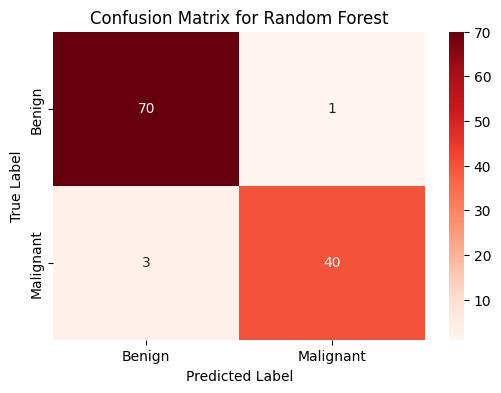

In [26]:
# Step 8: Visualization of Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

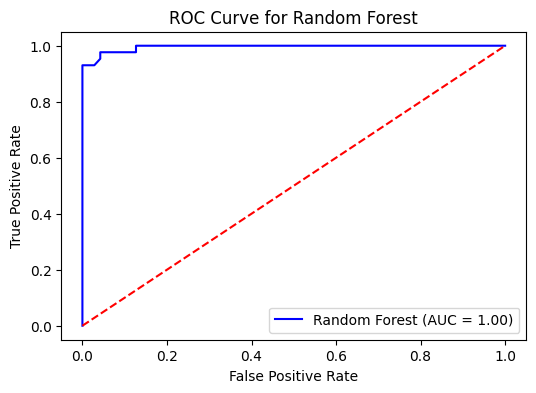

In [31]:
# Step 9: ROC Curve
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred_prob):.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
plot_roc_curve(y_test, y_pred_prob_rf, "Random Forest")